In [1]:
import os #Setup
from os import path
import sys


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
proj_dir = os.path.abspath(os.path.join(os.path.dirname('abundance_stoolsubset.csv'), os.pardir,))
sys.path.append(proj_dir) #Load in the dataset

In [3]:
data = pd.read_csv(path.join(proj_dir, 'data', 'abundance_stoolsubset.csv'))

C:\Users\Tommy\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (5,20) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
data.head()


,dataset_name,sampleID,subjectID,bodysite,disease,age,gender,country,sequencing_technology,pubmedid,...,k__Bacteria|p__Firmicutes|c__Bacilli|o__Lactobacillales|f__Enterococcaceae|g__Enterococcus|s__Enterococcus_gilvus|t__Enterococcus_gilvus_unclassified,k__Bacteria|p__Firmicutes|c__Bacilli|o__Lactobacillales|f__Lactobacillaceae|g__Lactobacillus|s__Lactobacillus_otakiensis,k__Bacteria|p__Firmicutes|c__Bacilli|o__Lactobacillales|f__Lactobacillaceae|g__Lactobacillus|s__Lactobacillus_otakiensis|t__GCF_000415925,k__Bacteria|p__Firmicutes|c__Clostridia|o__Clostridiales|f__Peptococcaceae,k__Bacteria|p__Firmicutes|c__Clostridia|o__Clostridiales|f__Peptococcaceae|g__Desulfotomaculum,k__Bacteria|p__Firmicutes|c__Clostridia|o__Clostridiales|f__Peptococcaceae|g__Desulfotomaculum|s__Desulfotomaculum_ruminis,k__Bacteria|p__Firmicutes|c__Clostridia|o__Clostridiales|f__Peptococcaceae|g__Desulfotomaculum|s__Desulfotomaculum_ruminis|t__GCF_000215085,k__Bacteria|p__Firmicutes|c__Clostridia|o__Clostridiales|f__Ruminococcaceae|g__Faecalibacterium|s__Faecalibacterium_prausnitzii|t__GCF_000209855,k__Bacteria|p__Firmicutes|c__Negativicutes|o__Selenomonadales|f__Veillonellaceae|g__Megasphaera|s__Megasphaera_sp_BV3C16_1,k__Bacteria|p__Firmicutes|c__Negativicutes|o__Selenomonadales|f__Veillonellaceae|g__Megasphaera|s__Megasphaera_sp_BV3C16_1|t__GCF_000478965
0,Candela_Africa,H10,h10,stool,n,40,female,tanzania,Illumina,25981789,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Candela_Africa,H11,h11,stool,n,29,female,tanzania,Illumina,25981789,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Candela_Africa,H12,h12,stool,n,8,female,tanzania,Illumina,25981789,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Candela_Africa,H13,h13,stool,n,34,male,tanzania,Illumina,25981789,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Candela_Africa,H14,h14,stool,n,30,male,tanzania,Illumina,25981789,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
print(data.shape)

(1989, 2339)


In [6]:
print(data.info)

<bound method DataFrame.info of                         dataset_name            sampleID subjectID bodysite  \
0                     Candela_Africa                 H10       h10    stool   
1                     Candela_Africa                 H11       h11    stool   
2                     Candela_Africa                 H12       h12    stool   
3                     Candela_Africa                 H13       h13    stool   
4                     Candela_Africa                 H14       h14    stool   
...                              ...                 ...       ...      ...   
1984  Zeller_fecal_colorectal_cancer  CCIS95409808ST-4-0    fr-152    stool   
1985  Zeller_fecal_colorectal_cancer  CCIS96387239ST-4-0    fr-626    stool   
1986  Zeller_fecal_colorectal_cancer  CCIS98482370ST-3-0    fr-052    stool   
1987  Zeller_fecal_colorectal_cancer  CCIS98512455ST-4-0    fr-459    stool   
1988  Zeller_fecal_colorectal_cancer  CCIS98832363ST-4-0    fr-552    stool   

            disease

In [7]:
data.dataset_name.unique()

array(['Candela_Africa', 'Chatelier_gut_obesity', 'hmp', 'hmpii',
       'Loman2013_EcoliOutbreak_DNA_HiSeq',
       'Loman2013_EcoliOutbreak_DNA_MiSeq', 'metahit',
       'Neilsen_genome_assembly', 'Quin_gut_liver_cirrhosis',
       'Tito_subsistence_gut', 't2dmeta_long', 't2dmeta_short', 'WT2D',
       'Zeller_fecal_colorectal_cancer'], dtype=object)

In [8]:
data['dataset_name'].value_counts() #metahit is the IBD dataset

Neilsen_genome_assembly              382
t2dmeta_long                         290
Chatelier_gut_obesity                278
Quin_gut_liver_cirrhosis             232
hmp                                  152
WT2D                                 145
Zeller_fecal_colorectal_cancer       134
metahit                              110
t2dmeta_short                         73
Tito_subsistence_gut                  58
hmpii                                 44
Loman2013_EcoliOutbreak_DNA_HiSeq     44
Candela_Africa                        38
Loman2013_EcoliOutbreak_DNA_MiSeq      9
Name: dataset_name, dtype: int64

In [9]:
ibd = data[data["dataset_name"]=='metahit']

In [10]:
print(ibd.shape)

(110, 2339)


In [11]:
ibd.head()

,dataset_name,sampleID,subjectID,bodysite,disease,age,gender,country,sequencing_technology,pubmedid,...,k__Bacteria|p__Firmicutes|c__Bacilli|o__Lactobacillales|f__Enterococcaceae|g__Enterococcus|s__Enterococcus_gilvus|t__Enterococcus_gilvus_unclassified,k__Bacteria|p__Firmicutes|c__Bacilli|o__Lactobacillales|f__Lactobacillaceae|g__Lactobacillus|s__Lactobacillus_otakiensis,k__Bacteria|p__Firmicutes|c__Bacilli|o__Lactobacillales|f__Lactobacillaceae|g__Lactobacillus|s__Lactobacillus_otakiensis|t__GCF_000415925,k__Bacteria|p__Firmicutes|c__Clostridia|o__Clostridiales|f__Peptococcaceae,k__Bacteria|p__Firmicutes|c__Clostridia|o__Clostridiales|f__Peptococcaceae|g__Desulfotomaculum,k__Bacteria|p__Firmicutes|c__Clostridia|o__Clostridiales|f__Peptococcaceae|g__Desulfotomaculum|s__Desulfotomaculum_ruminis,k__Bacteria|p__Firmicutes|c__Clostridia|o__Clostridiales|f__Peptococcaceae|g__Desulfotomaculum|s__Desulfotomaculum_ruminis|t__GCF_000215085,k__Bacteria|p__Firmicutes|c__Clostridia|o__Clostridiales|f__Ruminococcaceae|g__Faecalibacterium|s__Faecalibacterium_prausnitzii|t__GCF_000209855,k__Bacteria|p__Firmicutes|c__Negativicutes|o__Selenomonadales|f__Veillonellaceae|g__Megasphaera|s__Megasphaera_sp_BV3C16_1,k__Bacteria|p__Firmicutes|c__Negativicutes|o__Selenomonadales|f__Veillonellaceae|g__Megasphaera|s__Megasphaera_sp_BV3C16_1|t__GCF_000478965
565,metahit,MH0002,mh0002,stool,n,59,female,denmark,Illumina,20203603,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
566,metahit,MH0003,mh0003,stool,n,69,male,denmark,Illumina,20203603,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
567,metahit,MH0006,mh0006,stool,n,59,female,denmark,Illumina,20203603,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
568,metahit,MH0009,mh0009,stool,n,64,male,denmark,Illumina,20203603,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
569,metahit,MH0011,mh0011,stool,n,0,female,denmark,Illumina,20203603,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [12]:
from sklearn.ensemble import RandomForestClassifier

In [13]:
rf = RandomForestClassifier(n_estimators = 500, max_depth=5, random_state=5523) #Try a random forest

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
ibd.disease.unique()

array(['n', 'ibd_ulcerative_colitis', 'ibd_crohn_disease'], dtype=object)

In [16]:
ibd.loc[:,'disease'] = ibd.disease.map({'n':0, 'ibd_ulcerative_colitis':1, 'ibd_crohn_disease':1}) #Map no diesease to 0 and all others to 1

C:\Users\Tommy\anaconda3\lib\site-packages\pandas\core\indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [17]:

ibd.loc[:, (ibd != 0).any(axis=0)] #Eliminate bacteria that are 0 in all rows.

ibd = ibd.loc[:, (ibd != 0).any(axis=0)]

In [53]:
X, y = ibd.iloc[:,211:], ibd['disease'] #Separate predictors and labels

565    0
566    0
567    0
568    0
569    0
      ..
670    1
671    0
672    0
673    0
674    0
Name: disease, Length: 110, dtype: int64

In [18]:
X_train, X_test, y_train, y_test = train_test_split(ibd.iloc[:,211:], ibd['disease']
                                                    ,test_size=0.20, random_state=5523)

In [19]:
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=5, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=5523,
                       verbose=0, warm_start=False)

In [20]:
from sklearn import metrics

In [21]:
rf_pred = rf.predict(X_test)

In [22]:
rf_pred #Predict all 0's, not ideal

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      dtype=int64)

In [79]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, rf_pred, pos_label=1)

metrics.auc(fpr, tpr) #AUC is 0.5, also not ideal

0.5

In [87]:
metrics.roc_auc_score(y_test, rf.predict_proba(X_test)[:,1])

0.5

In [76]:
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, rf_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.5

In [97]:
n_estimators = [1, 2, 4, 8, 16, 32, 64, 100, 200, 500, 1000] #Try tuning parameters, AUC still 0.5
train_results = []
test_results = []
for estimator in n_estimators:
   rf = RandomForestClassifier(n_estimators=estimator, n_jobs=-1)
   rf.fit(X_train, y_train)
   train_pred = rf.predict(X_train)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)
   y_pred = rf.predict(X_test)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(n_estimators, train_results, 'b', label='Train AUC')
line2, = plt.plot(n_estimators, test_results, 'r', label='Test AUC')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('n_estimators')
plt.show()

ValueError: bad input shape (88, 2)

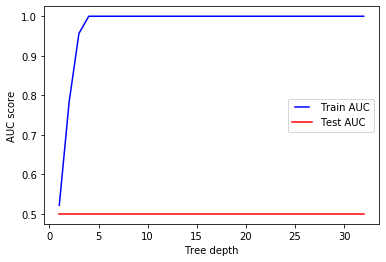

In [27]:
max_depths = np.linspace(1, 32, 32, endpoint=True) #Parameter tuning, no improvement :/
train_results = []
test_results = []
for max_depth in max_depths:
   rf = RandomForestClassifier(max_depth=max_depth, n_jobs=-1)
   rf.fit(X_train, y_train)
   train_pred = rf.predict(X_train)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)
   y_pred = rf.predict(X_test)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(max_depths, train_results, 'b', label='Train AUC')
line2, = plt.plot(max_depths, test_results, 'r', label='Test AUC')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('Tree depth')
plt.show()

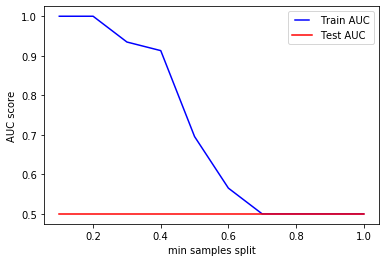

In [28]:
min_samples_splits = np.linspace(0.1, 1.0, 10, endpoint=True)
train_results = []
test_results = []
for min_samples_split in min_samples_splits:
   rf = RandomForestClassifier(min_samples_split=min_samples_split)
   rf.fit(X_train, y_train)
   train_pred = rf.predict(X_train)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)
   y_pred = rf.predict(X_test)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(min_samples_splits, train_results, 'b', label='Train AUC')
line2, = plt.plot(min_samples_splits, test_results, 'r', label='Test AUC')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('min samples split')
plt.show()

In [29]:
from sklearn.naive_bayes import GaussianNB

In [30]:
gnb = GaussianNB()


In [31]:
gnb_pred = gnb.fit(X_train, y_train).predict(X_test)

In [32]:
from sklearn.neural_network import MLPClassifier

In [33]:
NN = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 100), random_state=5523)

In [34]:
NN.fit(X_train, y_train)

MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(5, 100), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=5523, shuffle=True, solver='lbfgs',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [35]:
NN.predict(X_test)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      dtype=int64)

In [36]:
gnb_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      dtype=int64)

In [37]:
sum(y_test)

2

In [38]:
rf2 = RandomForestClassifier(n_estimators = 500, max_depth=5, max_features = "auto", random_state=5523) #Try a random forest

In [39]:
rf2.fit(X_train, y_train)

rf2_pred= rf2.predict(X_test)


In [40]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, rf2_pred, pos_label=1)

In [41]:
metrics.auc(fpr, tpr) #AUC is 0.5, also not ideal

0.5

In [42]:
importances = rf2.feature_importances_

In [43]:
np.sort(importances)[::-1]

array([0.01712437, 0.01647223, 0.01613167, ..., 0.        , 0.        ,
       0.        ])

In [44]:
from sklearn.feature_selection import SelectFromModel

sfm = SelectFromModel(rf2, threshold = -np.inf, max_features = 69) #Select only the 200 most important features

In [45]:
sfm.fit(X_train, y_train)

SelectFromModel(estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                                 class_weight=None,
                                                 criterion='gini', max_depth=5,
                                                 max_features='auto',
                                                 max_leaf_nodes=None,
                                                 max_samples=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=1,
                                                 min_samples_split=2,
                                                 min_weight_fraction_leaf=0.0,
                                                 n_estimators=500, n_jobs=None,
                                                 oob_score=False,
                                                 ra

In [46]:
X_important_train = sfm.transform(X_train)
X_important_test = sfm.transform(X_test)

In [47]:
rf2_important = RandomForestClassifier(n_estimators = 500, max_depth=5, max_features = "auto", random_state=5523) #Try a random forest

In [48]:
rf2_important.fit(X_important_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=5, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=5523,
                       verbose=0, warm_start=False)

In [49]:
y_important_pred = rf2_important.predict(X_important_test)

In [89]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_important_pred, pos_label=1)
metrics.auc(fpr, tpr)

0.5

array([[0.84332338, 0.15667662],
       [0.99019446, 0.00980554],
       [0.99049692, 0.00950308],
       [0.75087748, 0.24912252],
       [0.95979855, 0.04020145],
       [0.80840274, 0.19159726],
       [0.87015939, 0.12984061],
       [0.77185419, 0.22814581],
       [0.86079712, 0.13920288],
       [0.93598912, 0.06401088],
       [0.9414714 , 0.0585286 ],
       [0.64819508, 0.35180492],
       [0.70931152, 0.29068848],
       [0.6763066 , 0.3236934 ],
       [0.90994651, 0.09005349],
       [0.96299389, 0.03700611],
       [0.85312876, 0.14687124],
       [0.87687142, 0.12312858],
       [0.95682669, 0.04317331],
       [0.98478143, 0.01521857],
       [0.90052917, 0.09947083],
       [0.93315452, 0.06684548]])

In [51]:
metrics.accuracy_score(y_test, y_important_pred)

0.9090909090909091

In [61]:
from sklearn.model_selection import KFold #Doing kfold
from sklearn.model_selection import cross_val_score #Other way to do Kfold?

In [84]:
    scores = cross_val_score(rf2, X, y, cv=10, scoring = 'roc_auc') #This suggests we have good AUC values. 

In [85]:
scores.mean(), scores

(0.8902777777777778,
 array([1.        , 0.83333333, 1.        , 1.        , 0.77777778,
        0.875     , 0.91666667, 1.        , 0.625     , 0.875     ]))